In [9]:
# Data analysis packages:
import pandas as pd
import numpy as np
#from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt


filename = 'df_imputed_scaled_OHE_reducedv1.pkl'
df = pd.read_pickle(filename)

In [10]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score

X = df[df.columns[:-1]]
y = pd.Series(df['heartdisease'])


#train_X,test_X,train_y,test_y =train_test_split(X,y,test_size=0.2, random_state=45)






In [11]:
#Building Models according to the best hyperparameters
#found by RandomSearchCV

model_Decision_Tree =DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')

'''
-- Best Parameters: DT_randomSEARCH
parameters: max_depth            setting: 1
parameters: min_samples_split    setting: 4
parameters: max_leaf_nodes       setting: 8
parameters: min_samples_leaf     setting: 13
parameters: criterion            setting: gini
'''

    
    
model_RandomForest = RandomForestClassifier(n_estimators= 600,
               max_features= 'sqrt',
               max_depth= 30,
               min_samples_split= 2,
               min_samples_leaf= 4,
               bootstrap= True)

model_extraTrees = ExtraTreesClassifier(n_estimators= 1600,
               max_features= 'sqrt',
               max_depth= 50,
               min_samples_split= 2,
               min_samples_leaf= 2,
               bootstrap= True)
bagged_DT_model = BaggingClassifier(base_estimator= model_Decision_Tree, n_estimators =  800, random_state = 34)

[Fold 1/10]
TRAIN: [ 80  81  82  84  85  86  87  88  89  90  92  93  94  98  99 100 101 102
 103 105 112 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254
 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272
 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290
 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308
 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326
 327 328 329 330 331 332 333 334

[Fold 4/10]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 223 224 228 229 231 232 235 236 237 243 245 246
 247 248 251 259 261 264 265 266

[Fold 7/10]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241

[Fold 10/10]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 24

[Fold 3/10]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 153 154 155 156 157 158 161 168 170 172 174 175
 177 180 181 184 187 188 189 191 192 193 195 199 205 206 207 209 211 213
 214 222 223 224 225 226 227 228 229 230 233 234 238 239 240 241 242 244
 249 250 252 253 254 255 256 257 258 260 262 263 269 271 273 275 276 277
 279 281 283 287 288 289 291 295 302 303 305 307 308 309 310 312 313 315
 317 318 320 323 324 325 327 328

[Fold 6/10]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241

[Fold 9/10]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241

[Fold 2/10]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  83  91  95  96  97 104 106 107 108 109
 110 111 113 150 151 152 159 160 162 163 164 165 166 167 169 171 173 176
 178 179 182 183 185 186 190 194 196 197 198 200 201 202 203 204 208 210
 212 215 216 217 218 219 220 221 222 225 226 227 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325
 326 327 328 329 330 331 332 333

[Fold 5/10]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241

[Fold 8/10]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241

[Fold 1/10]
TRAIN: [ 80  81  82  84  85  86  87  88  89  90  92  93  94  98  99 100 101 102
 103 105 112 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254
 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272
 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290
 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308
 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326
 327 328 329 330 331 332 333 334

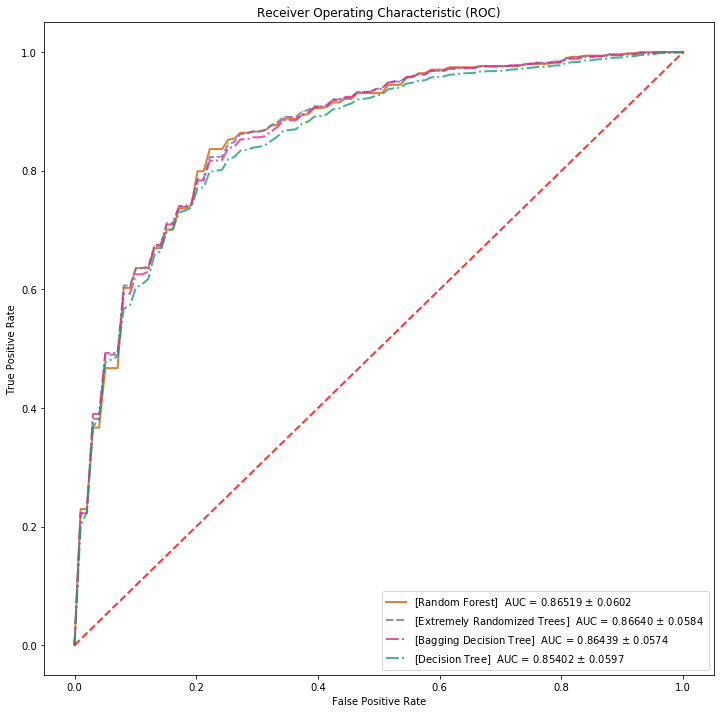

,AUC Mean,std
Random Forest,0.865191,0.060159
Extremely Randomized Trees,0.866402,0.058441
Bagging Decision Tree,0.864392,0.057375
Decision Tree,0.854017,0.059673


In [5]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#'aqua', 'darkorange', 'cornflowerblue'
models = [
    
    
    {
        'label' : 'Random Forest',
        'model': model_RandomForest,
        'color': '#d95f02',
        'linestyle': 'solid', 
        'markers': '',
         
    },
    {
        'label' : 'Extremely Randomized Trees',
        'model': model_extraTrees,
        'color': '#7570b3',
        'linestyle': 'dashed',
        'markers': ',',
    },
    {
        'label' : 'Bagging Decision Tree',
        'model': bagged_DT_model, 
        'color': '#e7298a',
        'linestyle': '-.',
        'markers': ''
    },
    {
        'label' : 'Decision Tree',
        'model': model_Decision_Tree, 
        'color': '#1b9e77',
        'linestyle': '-.',
        'markers': ''
    },
    

]







# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
splits = 10
#cv = StratifiedKFold(n_splits=splits, random_state = random_state)
%store -r

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

aucs_mean = []
labels = []
std_mean = []


   


plt.figure(figsize=(12,12))
for m in models:
    i = 0
    for i,(train_index, test_index) in enumerate(cv.split(X, y)):
        
        print('[Fold %d/%d]' % (i + 1, splits))
        print("TRAIN:", train_index, "\nTEST:", test_index)
        train_X = X.iloc[train_index]
        train_y = y.iloc[train_index]
        test_X = X.iloc[test_index]
        test_y = y.iloc[test_index]
        probas_ = m['model'].fit(train_X, train_y).predict_proba(test_X)
        
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        #plt.plot(fpr, tpr, lw=1, alpha=0.3,
        #         label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    plt.plot(mean_fpr, mean_tpr, color= m['color'], linestyle = m['linestyle'], marker= m['markers'],
             label=r'[%s]  AUC = %0.5f $\pm$ %0.4f ' % (m['label'] ,mean_auc, std_auc),
             lw=2, alpha=.8)

    aucs_mean.append(mean_auc)
    std_mean.append(std_auc)
    labels.append(m['label']) 
    



    #plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    # label=r'$\pm$ 1 std. dev.')
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
plt.show()
AUCs=pd.DataFrame({'AUC Mean':aucs_mean, 'std':std_mean },index = labels)       
AUCs



In [13]:
from sklearn.model_selection import KFold,StratifiedKFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score, cross_validate #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
from sklearn.metrics.scorer import make_scorer
from IPython.display import display, HTML


scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'F-score': make_scorer( f1_score),
           'accuracy': make_scorer(accuracy_score)}

kfold = StratifiedKFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts

classifiers=['Decision Tree','Random Forest','Extremely \n Randomized Trees','Bagging Decision Tree']
models=[model_Decision_Tree, model_RandomForest, model_extraTrees, bagged_DT_model]



fit_time = []
score_time = []

test_accuracy = []
test_accuracy_total = []

test_accuracy_std = []
train_accuracy = []
train_accuracy_total = []
train_accuracy_std = []


test_F_score = []
test_F_score_total = []


test_F_score_std = []
train_F_score = []
train_F_score_total = []

train_F_score_std = []


test_precision = []
test_precision_std = []
train_precision = []
train_precision_std = []


test_recall = []
test_recall_std = []
train_recall = []
train_recall_std = []









for i in models:
    model = i
    scores = cross_validate(model,X,y, cv = kfold, scoring = scoring, return_train_score=True)
    fit_time.append(scores['fit_time'].mean())
    score_time.append(scores['score_time'].mean())
    
    test_accuracy.append(scores['test_accuracy'].mean())
    test_accuracy_total.append(scores['test_accuracy'])
    
    test_accuracy_std.append(scores['test_accuracy'].std())
    train_accuracy.append(scores['train_accuracy'].mean())
    train_accuracy_total.append(scores['train_accuracy'])
                          
    train_accuracy_std.append(scores['train_accuracy'].std())
    
    test_F_score.append(scores['test_F-score'].mean())
    test_F_score_total.append(scores['test_F-score'])
    
    test_F_score_std.append(scores['test_F-score'].std())
    train_F_score.append(scores['train_F-score'].mean())
    train_F_score_total.append(scores['train_F-score'])
                         
                         
    train_F_score_std.append(scores['train_F-score'].std())
    
    test_precision.append(scores['test_precision'].mean())
    test_precision_std.append(scores['test_precision'].std())
    train_precision.append(scores['train_precision'].mean())
    train_precision_std.append(scores['train_precision'].std())
    
    test_recall.append(scores['test_recall'].mean())
    test_recall_std.append(scores['test_recall'].std())
    train_recall.append(scores['train_recall'].mean())
    train_recall_std.append(scores['train_recall'].std())
    

    print('Model: ' + str(i))

sorted(scores.keys())     
dct_acc = {'Test_accuracy':test_accuracy,
               'Test_accuracy_std':test_accuracy_std,
               'Train_accuracy':train_accuracy,
               'Train_accuracy_std':train_accuracy_std, }
dct_Fscore = {'Test_F_score':test_F_score,
               'Test_F_score_std':test_F_score_std,
               'Train_F_score': train_F_score,
               'Train_F_score_std': train_F_score_std}
dct_precision = {'Test_precision': test_precision,
               'Test_precision_std': test_precision_std,
               'Train_precision': train_precision,
               'Train_precision_std': train_precision_std}
dct_recall = {'Test_Sensitivity': test_recall, 
               'Test_Sensitivity_std': test_recall_std,
               'Train_Sensitivity': train_recall,
               'Train_Sensitivity_std': train_recall_std}
dct_time = {'Fit_time': fit_time, 'Scoring Time':score_time}

metrics_acc=pd.DataFrame(dct_acc,index=classifiers)       
metrics_Fsc = pd.DataFrame(dct_Fscore,index=classifiers)
metrics_precision = pd.DataFrame(dct_precision,index=classifiers) 
metrics_recall = pd.DataFrame(dct_recall,index=classifiers)
metrics_time = pd.DataFrame(dct_time,index=classifiers)
           
display(metrics_acc)
display(metrics_Fsc)
display(metrics_precision)
display(metrics_recall)
display(metrics_time)




Model: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')
Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Model: ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=50, max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
       

,Test_accuracy,Test_accuracy_std,Train_accuracy,Train_accuracy_std
Decision Tree,0.772819,0.049950,0.782005,0.006817
Random Forest,0.792279,0.061732,0.894442,0.005792
Extremely Randomized Trees,0.785804,0.059533,0.849997,0.008691
Bagging Decision Tree,0.770622,0.054411,0.790338,0.007124


,Test_F_score,Test_F_score_std,Train_F_score,Train_F_score_std
Decision Tree,0.799014,0.043749,0.806026,0.004436
Random Forest,0.817782,0.050047,0.907660,0.004822
Extremely Randomized Trees,0.816687,0.043260,0.870173,0.007763
Bagging Decision Tree,0.792757,0.047279,0.810716,0.006415


,Test_precision,Test_precision_std,Train_precision,Train_precision_std
Decision Tree,0.785152,0.052913,0.794775,0.019626
Random Forest,0.805443,0.074128,0.879635,0.007437
Extremely Randomized Trees,0.788716,0.075191,0.834774,0.006850
Bagging Decision Tree,0.796913,0.061411,0.810068,0.011170


,Test_Sensitivity,Test_Sensitivity_std,Train_Sensitivity,Train_Sensitivity_std
Decision Tree,0.817373,0.062461,0.818819,0.025147
Random Forest,0.841137,0.085607,0.937568,0.004500
Extremely Randomized Trees,0.854824,0.060107,0.908751,0.010838
Bagging Decision Tree,0.791843,0.055317,0.811614,0.012646


,Fit_time,Scoring Time
Decision Tree,0.001419,0.002404
Random Forest,1.006001,0.178710
Extremely Randomized Trees,2.101349,0.458607
Bagging Decision Tree,1.046594,0.210134


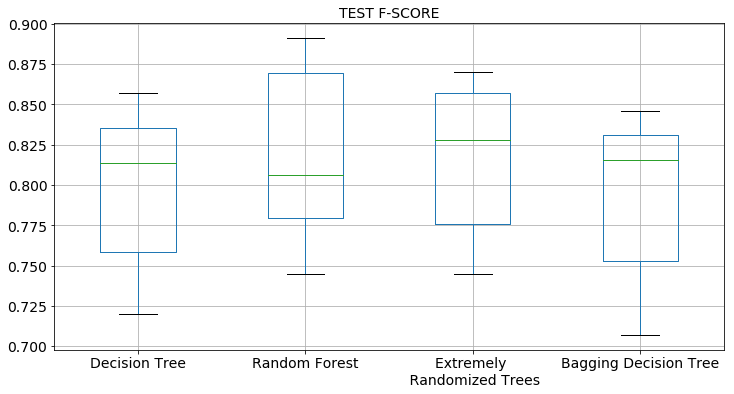

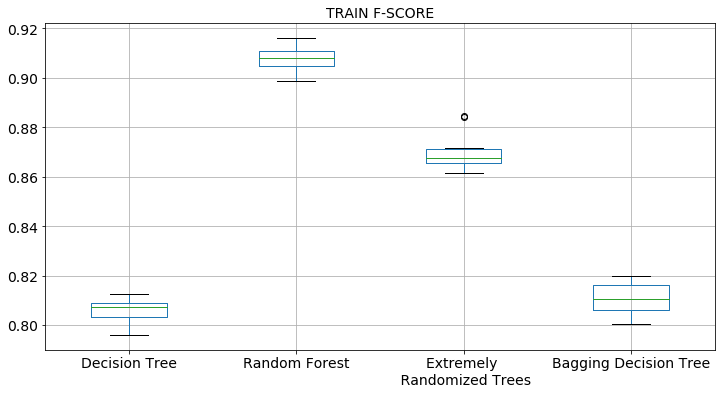

In [15]:
plt.figure(figsize=(12,6))



classifiers=['Decision Tree','Random Forest','Extremely \n Randomized Trees','Bagging Decision Tree']
plt.title('TEST F-SCORE',fontsize=14)
box_test_F_score=pd.DataFrame(test_F_score_total,index=[classifiers][0])
box_test_F_score.T.boxplot(fontsize=14)

plt.show()

plt.figure(figsize=(12,6))
plt.title('TRAIN F-SCORE', fontsize=14)
box_train_F_score=pd.DataFrame(train_F_score_total,index=[classifiers][0])
box_train_F_score.T.boxplot(fontsize=14)


plt.show()


